In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [7]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Row ID          4900.500000
Postal Code    55273.322403
Sales            230.769059
dtype: float64

In [8]:
df.max()

Row ID                                         9800
Order ID                             US-2018-169551
Order Date                               31/12/2017
Ship Date                                31/12/2018
Ship Mode                            Standard Class
Customer ID                                ZD-21925
Customer Name                    Zuschuss Donatelli
Segment                                 Home Office
Country                               United States
City                                           Yuma
State                                       Wyoming
Postal Code                                 99301.0
Region                                         West
Product ID                          TEC-PH-10004977
Category                                 Technology
Sub-Category                                 Tables
Product Name     netTALK DUO VoIP Telephone Service
Sales                                      22638.48
dtype: object

In [9]:
df.min()

Row ID                                                           1
Order ID                                            CA-2015-100006
Order Date                                              01/01/2018
Ship Date                                               01/01/2016
Ship Mode                                              First Class
Customer ID                                               AA-10315
Customer Name                                        Aaron Bergman
Segment                                                   Consumer
Country                                              United States
City                                                      Aberdeen
State                                                      Alabama
Postal Code                                                 1040.0
Region                                                     Central
Product ID                                         FUR-BO-10000112
Category                                                 Furni

In [10]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [12]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [13]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,3.0,0.338265,0.573113,0.001151,0.007398,0.013645,0.506822,1.0
Postal Code,3.0,0.329859,0.580665,-0.024067,-0.005211,0.013645,0.506822,1.0
Sales,3.0,0.325695,0.584102,-0.024067,-0.011458,0.001151,0.500576,1.0


In [16]:
df.unstack

<bound method DataFrame.unstack of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520   

In [17]:
df.skew()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Row ID          0.000000
Postal Code    -0.131295
Sales          12.983483
dtype: float64

In [18]:
df.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [19]:
df=df.fillna(0)

In [21]:
df.rename(columns={'Row ID':'Row_ID',
                   'Order ID': 'Order_ID',
                   'Order Date':'Order_Date',
                   'Ship Date':'Ship_Date',
                   'Customer ID':'Custmoer_ID',
                   'Customer Name':'Customer_Name',
                   'Postal Code':'Postal_Code',
                   'Product ID':'Product_ID',
                   'Sub-Category':'Sub_Category',
                   'Product Name':'Product_Name'},inplace=True)

In [22]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [23]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship Mode,Custmoer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [24]:
df['Sales'].describe() 

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [25]:
df.Sub_Category.value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub_Category, dtype: int64

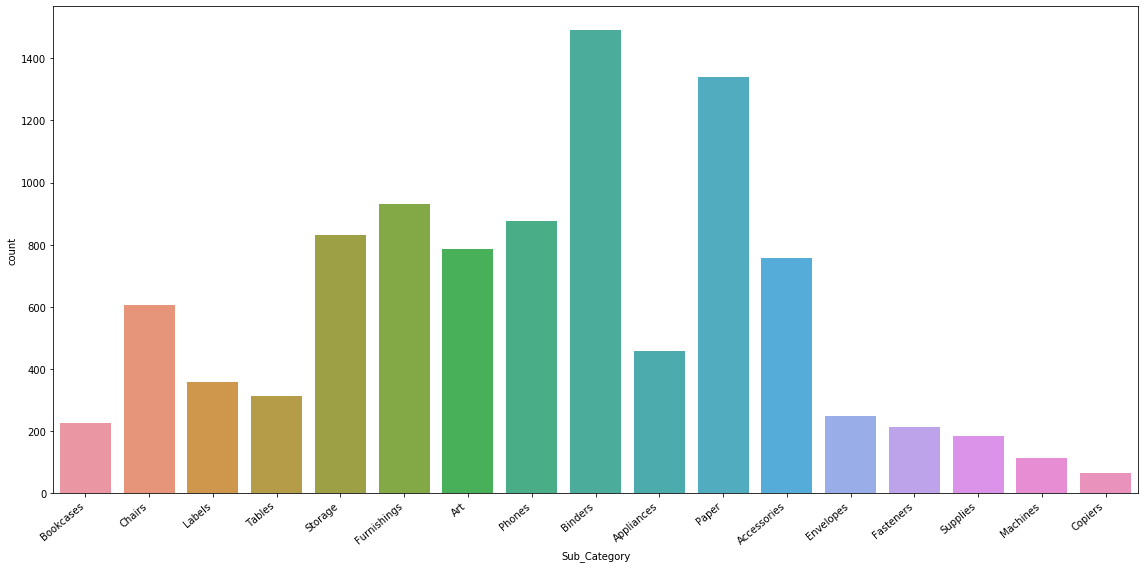

In [27]:
plt.figure(figsize=(16,8))
ax = sns.countplot(df['Sub_Category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [28]:
df.Segment.value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

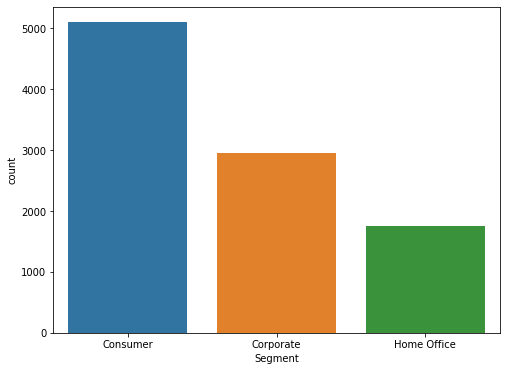

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(df['Segment'])

In [30]:
mask = (df.Sales > 700) & (df.Region == 'West') | (df.Segment=='Consumer')

In [31]:
mask

0        True
1        True
2       False
3        True
4        True
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [32]:
df['Sales'] = df.Sales.astype('int')

In [33]:
df.dtypes

Row_ID                    int64
Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date                object
Ship Mode                object
Custmoer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code             float64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                     int32
dtype: object

In [35]:
def get_Sales_level(Sales):
    if Sales > 10000:
        return 'costly'
    elif Sales > 1000:
        return 'medium'
    else:
        return 'chea'

In [36]:
get_Sales_level(12000)

'costly'

In [37]:
df['Sales_level'] = df.Sales.apply(get_Sales_level)

In [38]:
df.Category.value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

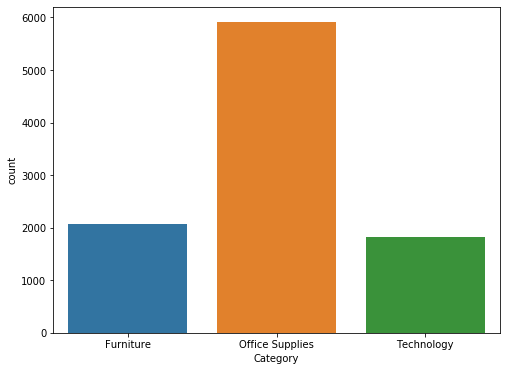

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(df['Category'])

In [40]:
df_sub = df.groupby(['Category','Sub_Category']).agg({'Sales': sum})
df_sub.sort_values(by='Sales',ascending=False).groupby('Category').head(5).sort_index()

Sales
Category        Sub_Category        
Furniture       Bookcases     113662
                Chairs        322475
                Furnishings    88692
                Tables        202646
Office Supplies Appliances    104355
                Binders       199225
                Paper          76044
                Storage       218876
                Supplies       46322
Technology      Accessories   163675
                Copiers       146184
                Machines      189155
                Phones        327126

In [41]:
city_df=df.groupby("City").sum().sort_values("Sales", ascending = False)
city_df = city_df[["Sales"]]
city_df

,Sales
City,
New York City,251912
Los Angeles,172992
Seattle,115847
San Francisco,108735
Philadelphia,108541
...,...
Ormond Beach,2
Jupiter,2
Pensacola,2


In [42]:
top_city_sales = city_df.head(10)

In [43]:
top_city_sales

,Sales
City,
New York City,251912
Los Angeles,172992
Seattle,115847
San Francisco,108735
Philadelphia,108541
Houston,63753
Chicago,47652
San Diego,47420
Jacksonville,44648


In [44]:
df.groupby('State').agg({'Sales':sum}).sort_values(by='Sales', ascending=False).head(10)

,Sales
State,
California,445142
New York,305681
Texas,168037
Washington,134899
Pennsylvania,115948
Florida,88229
Illinois,78976
Michigan,75967
Ohio,74878


In [45]:
df.groupby('Region').agg({'Sales':sum}).sort_values(by='Sales',ascending=False)

,Sales
Region,
West,708370
East,667854
Central,491321
South,388205


In [46]:
df.groupby(['Ship Mode']).sum()['Sales']

Ship Mode
First Class        344671
Same Day           124907
Second Class       448769
Standard Class    1337403
Name: Sales, dtype: int32

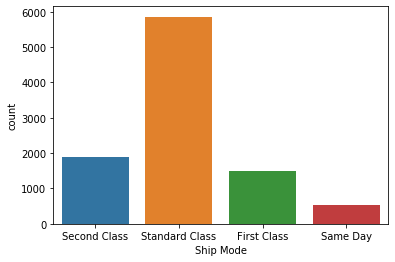

In [47]:
sns.countplot(df['Ship Mode'])

In [48]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True)

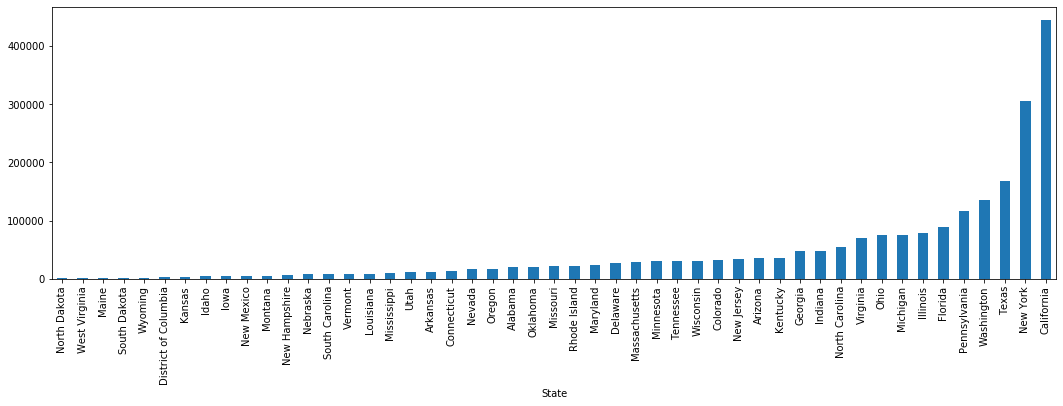

In [49]:
df.groupby(['State']).sum()['Sales'].sort_values().plot(kind='bar', figsize=(18,5))

In [50]:
df.groupby(['Sub_Category']).sum()['Sales']

Sub_Category
Accessories    163675
Appliances     104355
Art             26278
Binders        199225
Bookcases      113662
Chairs         322475
Copiers        146184
Envelopes       15982
Fasteners        2894
Furnishings     88692
Labels          12159
Machines       189155
Paper           76044
Phones         327126
Storage        218876
Supplies        46322
Tables         202646
Name: Sales, dtype: int32

In [51]:
categ_and_sum = pd.DataFrame(df.groupby(['Category', 'Sub_Category']).sum()['Sales'])

In [52]:
categ_and_sum

Sales
Category        Sub_Category        
Furniture       Bookcases     113662
                Chairs        322475
                Furnishings    88692
                Tables        202646
Office Supplies Appliances    104355
                Art            26278
                Binders       199225
                Envelopes      15982
                Fasteners       2894
                Labels         12159
                Paper          76044
                Storage       218876
                Supplies       46322
Technology      Accessories   163675
                Copiers       146184
                Machines      189155
                Phones        327126

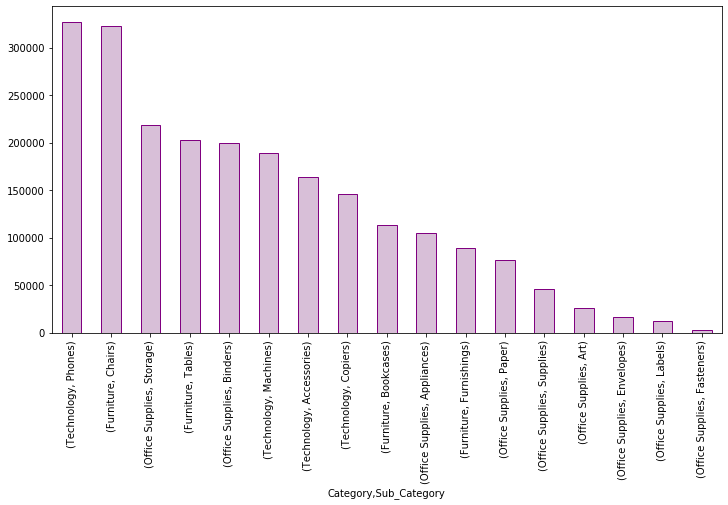

In [53]:
Sorted_Categs = categ_and_sum.sort_values('Sales', ascending=False)
Sorted_Categs.plot(kind='bar', figsize=(12,6), edgecolor='purple', legend=None, color='thistle')

In [54]:
df['Month'] = df['Order_Date'].dt.month_name()
df['Year'] = df['Order_Date'].dt.year

Text(0.5, 1.0, 'Sales based on Month')

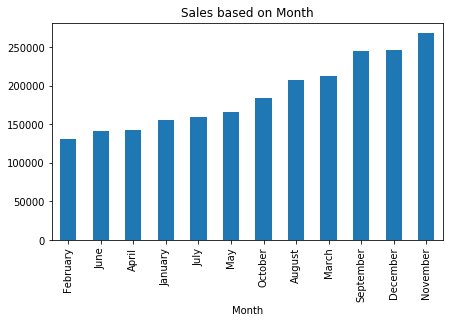

In [55]:
sales_month = df.groupby('Month').agg({'Sales':sum}).sort_values(by='Sales').plot.bar(figsize=(7,4),legend=None)
plt.title("Sales based on Month")

In [57]:
by_year = df.groupby("Year").sum().sort_values("Sales", ascending=False)
by_year = by_year[["Sales"]]
by_year

,Sales
Year,
2018,720126
2017,598712
2015,478695
2016,458217


In [58]:
by_year.reset_index(inplace=True)

In [59]:
by_year

,Year,Sales
0,2018,720126
1,2017,598712
2,2015,478695
3,2016,458217


In [60]:
top_sales = df.Product_Name.value_counts()

In [61]:
top_sales_10 = top_sales.head(10)

In [62]:
top_sales_10

Staple envelope                                              47
Staples                                                      46
Easy-staple paper                                            44
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      18
Staple remover                                               18
Storex Dura Pro Binders                                      17
KI Adjustable-Height Table                                   17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: Product_Name, dtype: int64

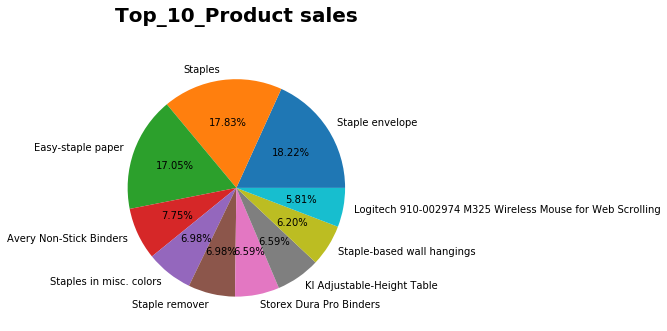

In [63]:
plt.figure(figsize = [6,5])
plt.pie(top_sales_10,labels=top_sales_10.index, autopct="%0.2f%%")
plt.title('Top_10_Product sales', pad = 30, fontsize=20, color='black',weight = 'bold');
plt.show()

In [65]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Row_ID" is
 1       1
6537    1
6530    1
6531    1
6532    1
       ..
3268    1
3269    1
3270    1
3271    1
9800    1
Name: Row_ID, Length: 9800, dtype: int64
-------------------------------------------------
unique values in column "Order_ID" is
 CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: Order_ID, Length: 4922, dtype: int64
-------------------------------------------------
unique values in column "Order_Date" is
 2017-05-09    38
2017-10-11    35
2018-02-12    34
2018-01-12    34
2018-02-09    33
              ..
2017-02-25     1
2017-10-25     1
2015-02-21     1
2015-11-09     1
2016-09-05     1
Name: Order_Date, Length: 1230, dtype: int64
-------------------------------------------------
unique values in column "Ship_Date" is
 2018-09-26    34
2018-12-06    32
20

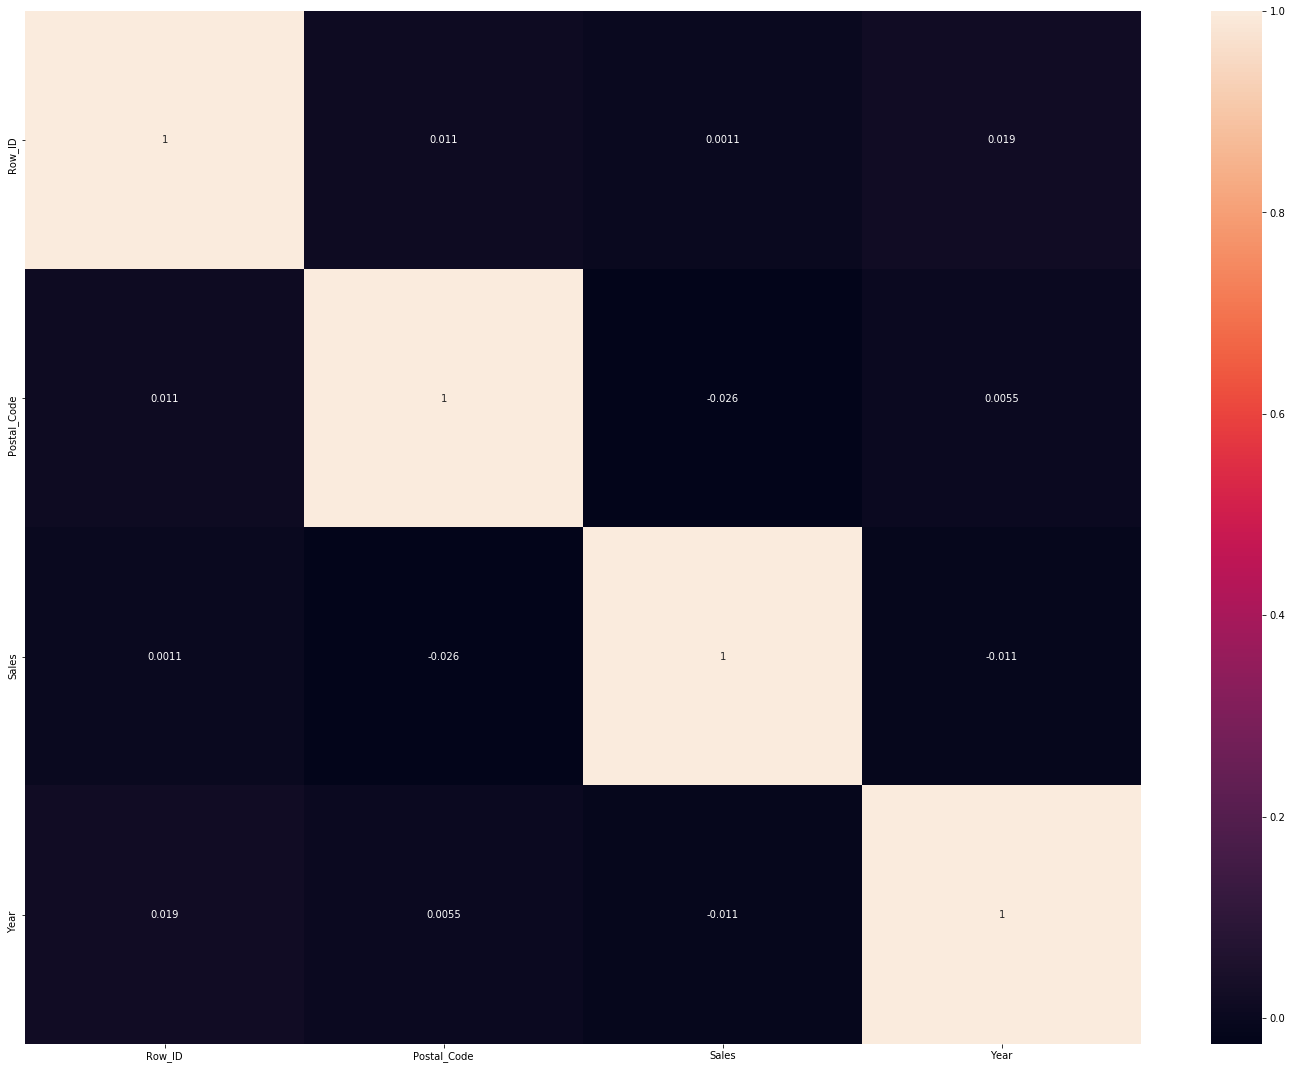

In [66]:
plt.figure(figsize=(25,19))
sns.heatmap(df.corr(),annot=True)

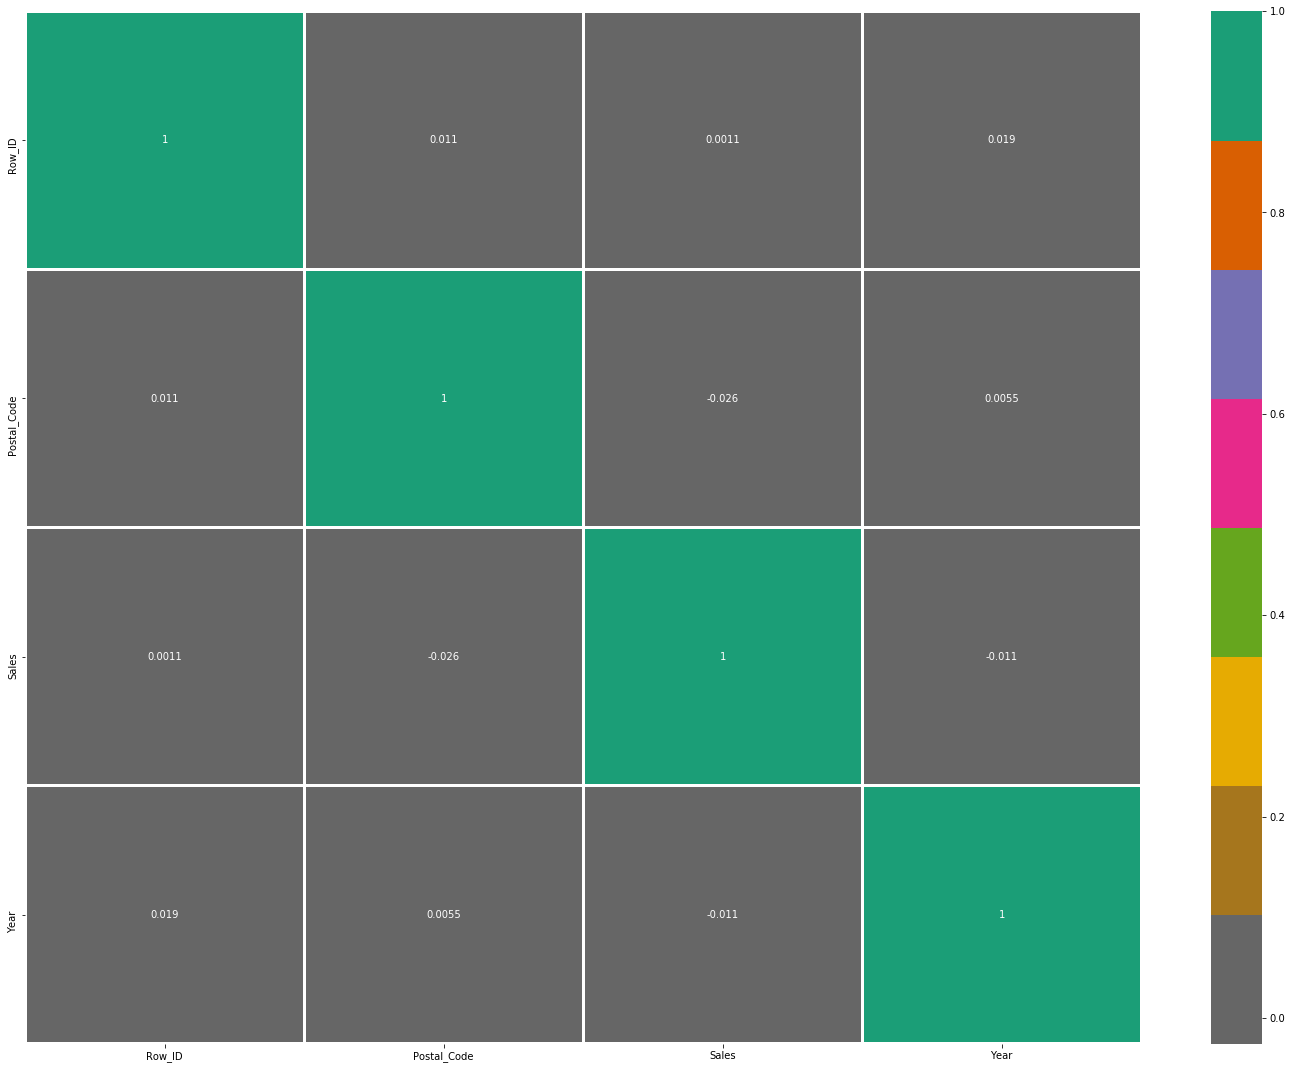

In [67]:
plt.figure(figsize=(25,19))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [68]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship Mode',
       'Custmoer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Sales_level', 'Month', 'Year'],
      dtype='object')